In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import nltk
import re
import missingno
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.tokenize import word_tokenize 
pd.pandas.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("BigBasket Products.csv")

In [3]:
df.drop('index',axis=1,inplace= True)

In [4]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [5]:
df.shape

(27555, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27554 non-null  object 
 1   category      27555 non-null  object 
 2   sub_category  27555 non-null  object 
 3   brand         27554 non-null  object 
 4   sale_price    27555 non-null  float64
 5   market_price  27555 non-null  float64
 6   type          27555 non-null  object 
 7   rating        18929 non-null  float64
 8   description   27440 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.9+ MB


<AxesSubplot: >

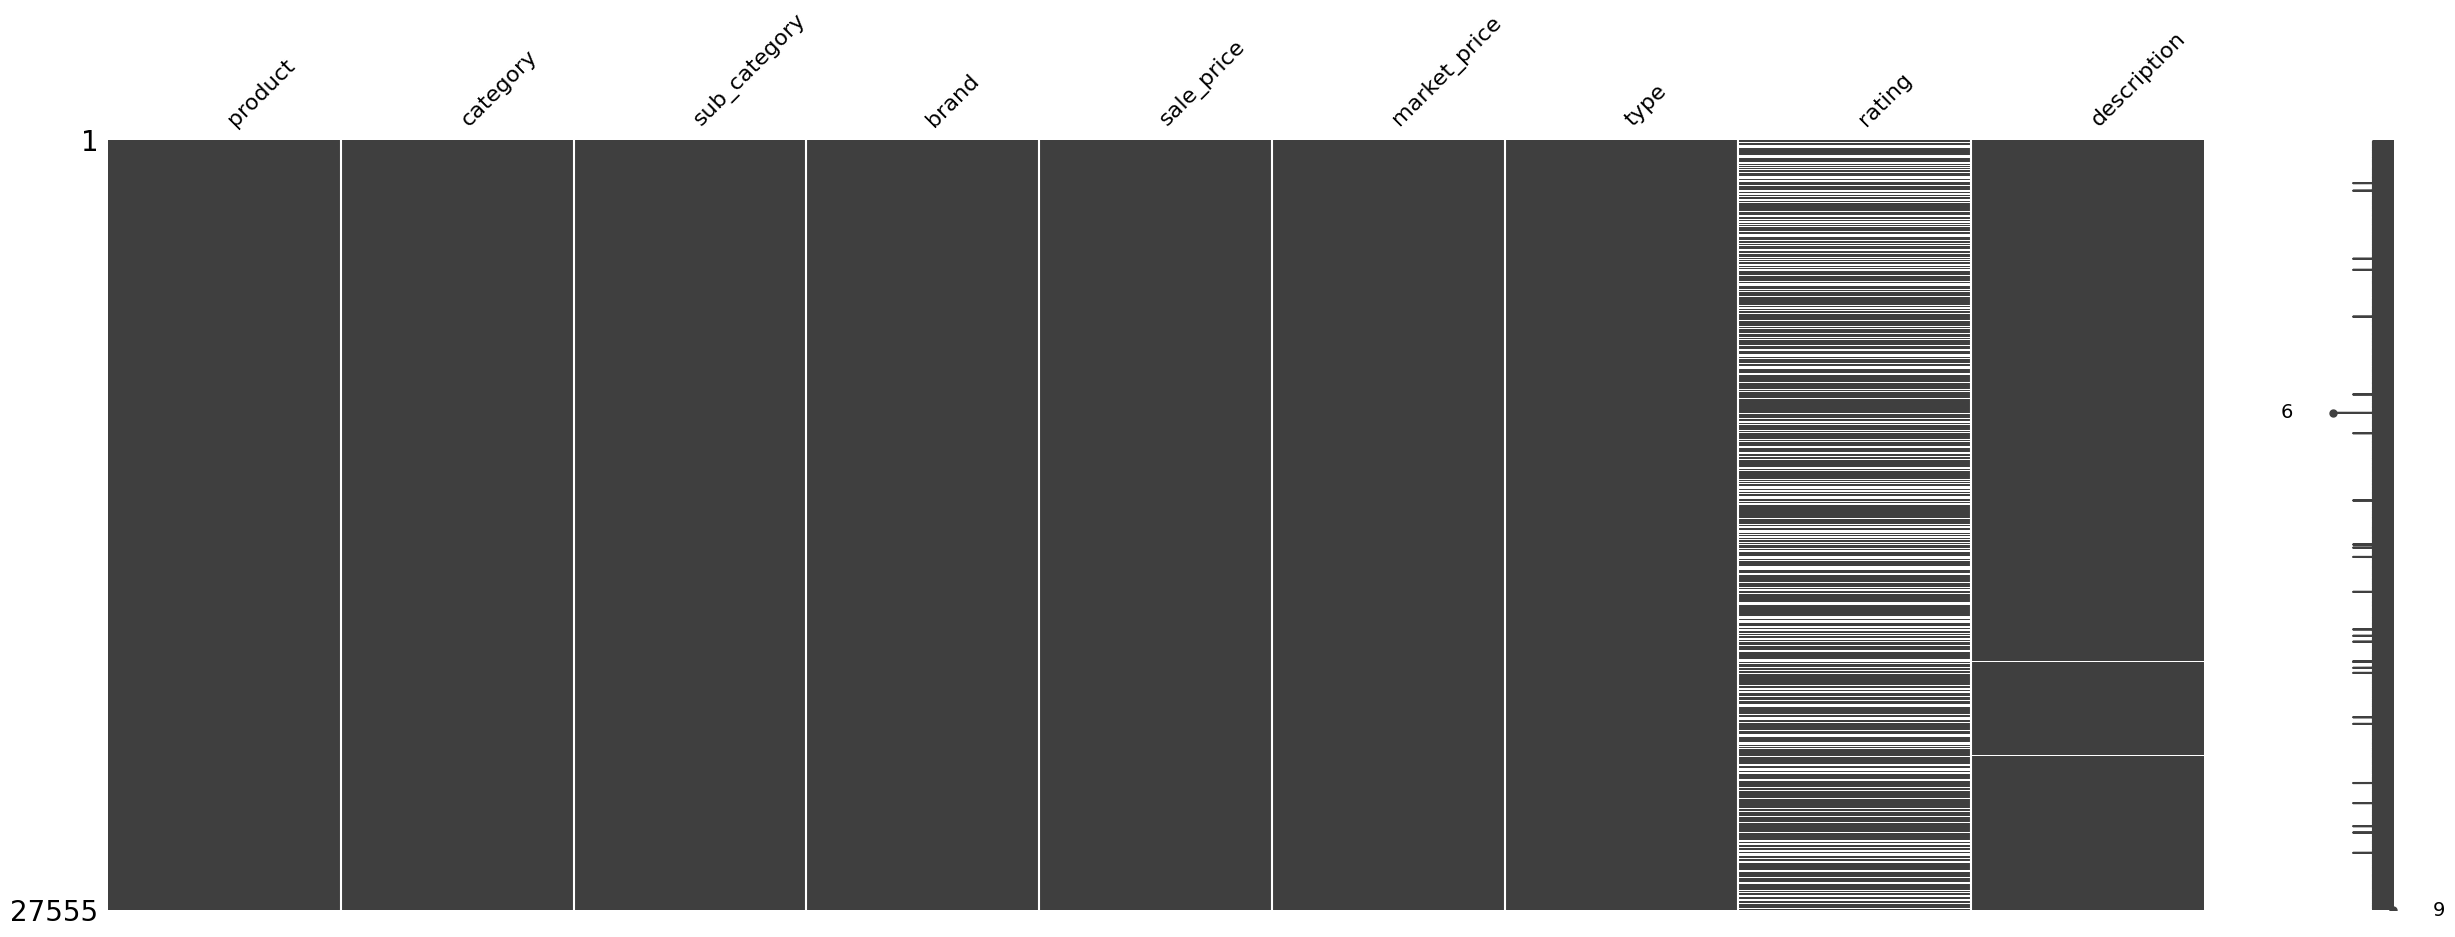

In [7]:
missingno.matrix(df, figsize = (30,10))

rating column has majority of data missing

In [8]:
df.isnull().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [9]:
df.isnull().mean()*100

product          0.003629
category         0.000000
sub_category     0.000000
brand            0.003629
sale_price       0.000000
market_price     0.000000
type             0.000000
rating          31.304663
description      0.417347
dtype: float64

31% data is missing from rating. Data imputation is required for 'rating' column. 

In [10]:
data_null = df[df['rating'].isnull()]
data_null.describe(include = 'all')

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
count,8626,8626,8626,8625,8626.000000,8626.000000,8626,0.0,8599
unique,7637,11,90,1179,NaN,NaN,378,NaN,7048
top,Aluminium Flat Bottom Patila Tope Pot - Silver,Beauty & Hygiene,Health & Medicine,Fresho,NaN,NaN,Ayurveda,NaN,Baldessarini Ambre Cologne is built around a w...
freq,6,2403,732,635,NaN,NaN,537,NaN,44
mean,NaN,NaN,NaN,NaN,442.643988,513.477460,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,665.675919,769.194123,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2.450000,5.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,132.750000,150.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,264.000000,299.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,481.712500,550.000000,NaN,NaN,NaN


In [11]:
df.category.nunique()

11

<AxesSubplot: xlabel='count', ylabel='category'>

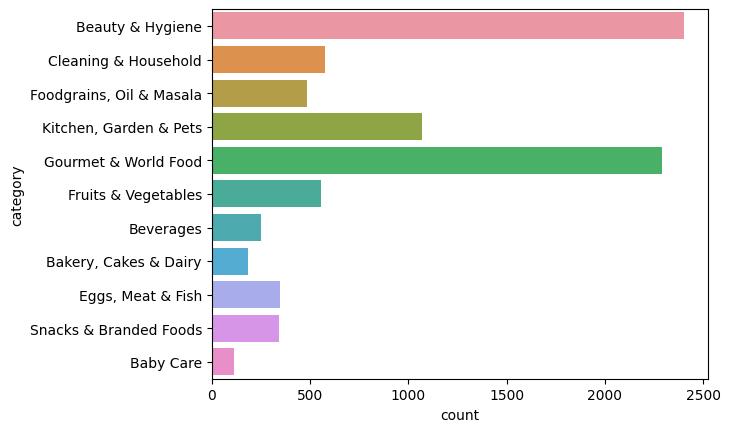

In [12]:
sns.countplot(data = data_null, y = data_null['category'])

In [13]:
df['missing_rating'] = df['rating']
df['missing_rating']=df['missing_rating'].replace(np.nan,0)
str(df['missing_rating'])

'0        4.1\n1        2.3\n2        3.4\n3        3.7\n4        4.4\n        ... \n27550    3.9\n27551    4.0\n27552    3.8\n27553    4.2\n27554    4.5\nName: missing_rating, Length: 27555, dtype: float64'

In [14]:
def detect_missing(df):
    if df['missing_rating']>0:
        val='not missing'
        return val
    else:
        val='missing'
        return val

In [15]:
df['missing_rating'] = df.apply(detect_missing,axis=1)

df['missing_rating'].astype('category')

df['missing_rating'].value_counts()

not missing    18929
missing         8626
Name: missing_rating, dtype: int64

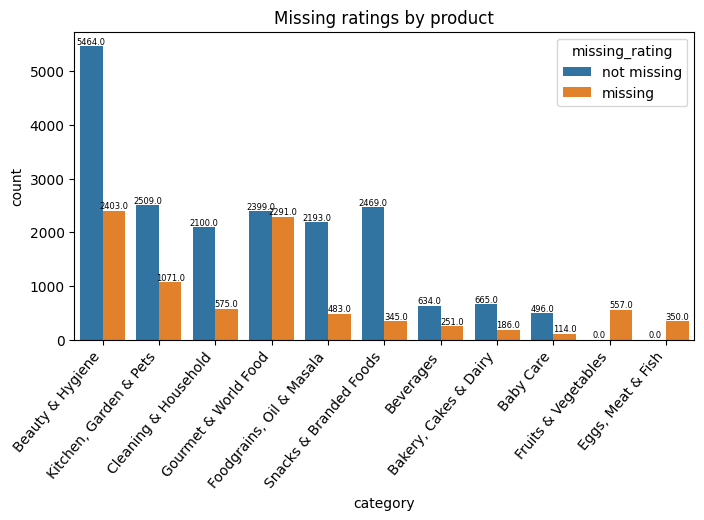

In [16]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df,x=df['category'],hue=df['missing_rating'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, horizontalalignment='right')
ax.set_title('Missing ratings by product', fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size='6')
plt.show()

Finding out the mean rating of each category for imputation 

In [17]:
df.groupby('category')['rating'].mean().round(2)

category
Baby Care                   4.02
Bakery, Cakes & Dairy       3.91
Beauty & Hygiene            3.93
Beverages                   4.08
Cleaning & Household        3.96
Eggs, Meat & Fish            NaN
Foodgrains, Oil & Masala    4.06
Fruits & Vegetables          NaN
Gourmet & World Food        3.98
Kitchen, Garden & Pets      3.73
Snacks & Branded Foods      3.98
Name: rating, dtype: float64

In [18]:
df.dropna(subset = ['product','brand','description'],axis=0,inplace=True)
df[['product','brand','description']].isnull().sum()

product        0
brand          0
description    0
dtype: int64

In [19]:
df.brand.nunique()

2309

In [20]:
df.rating.unique()

array([4.1, 2.3, 3.4, 3.7, 4.4, 3.3, 3.6, 4. , 3.5, 4.3, 2.2, 5. , 3.8,
       4.2, 4.9, 3.9, 1.5, 2.9, 2.6, 3. , 4.5, nan, 1. , 4.6, 4.8, 3.1,
       2. , 1.8, 2.8, 3.2, 4.7, 2.5, 2.4, 2.7, 2.1, 1.7, 1.9, 1.2, 1.3,
       1.4, 1.6])

In [21]:
df.sub_category.nunique()

90

In [22]:
sns.set(font_scale=2)

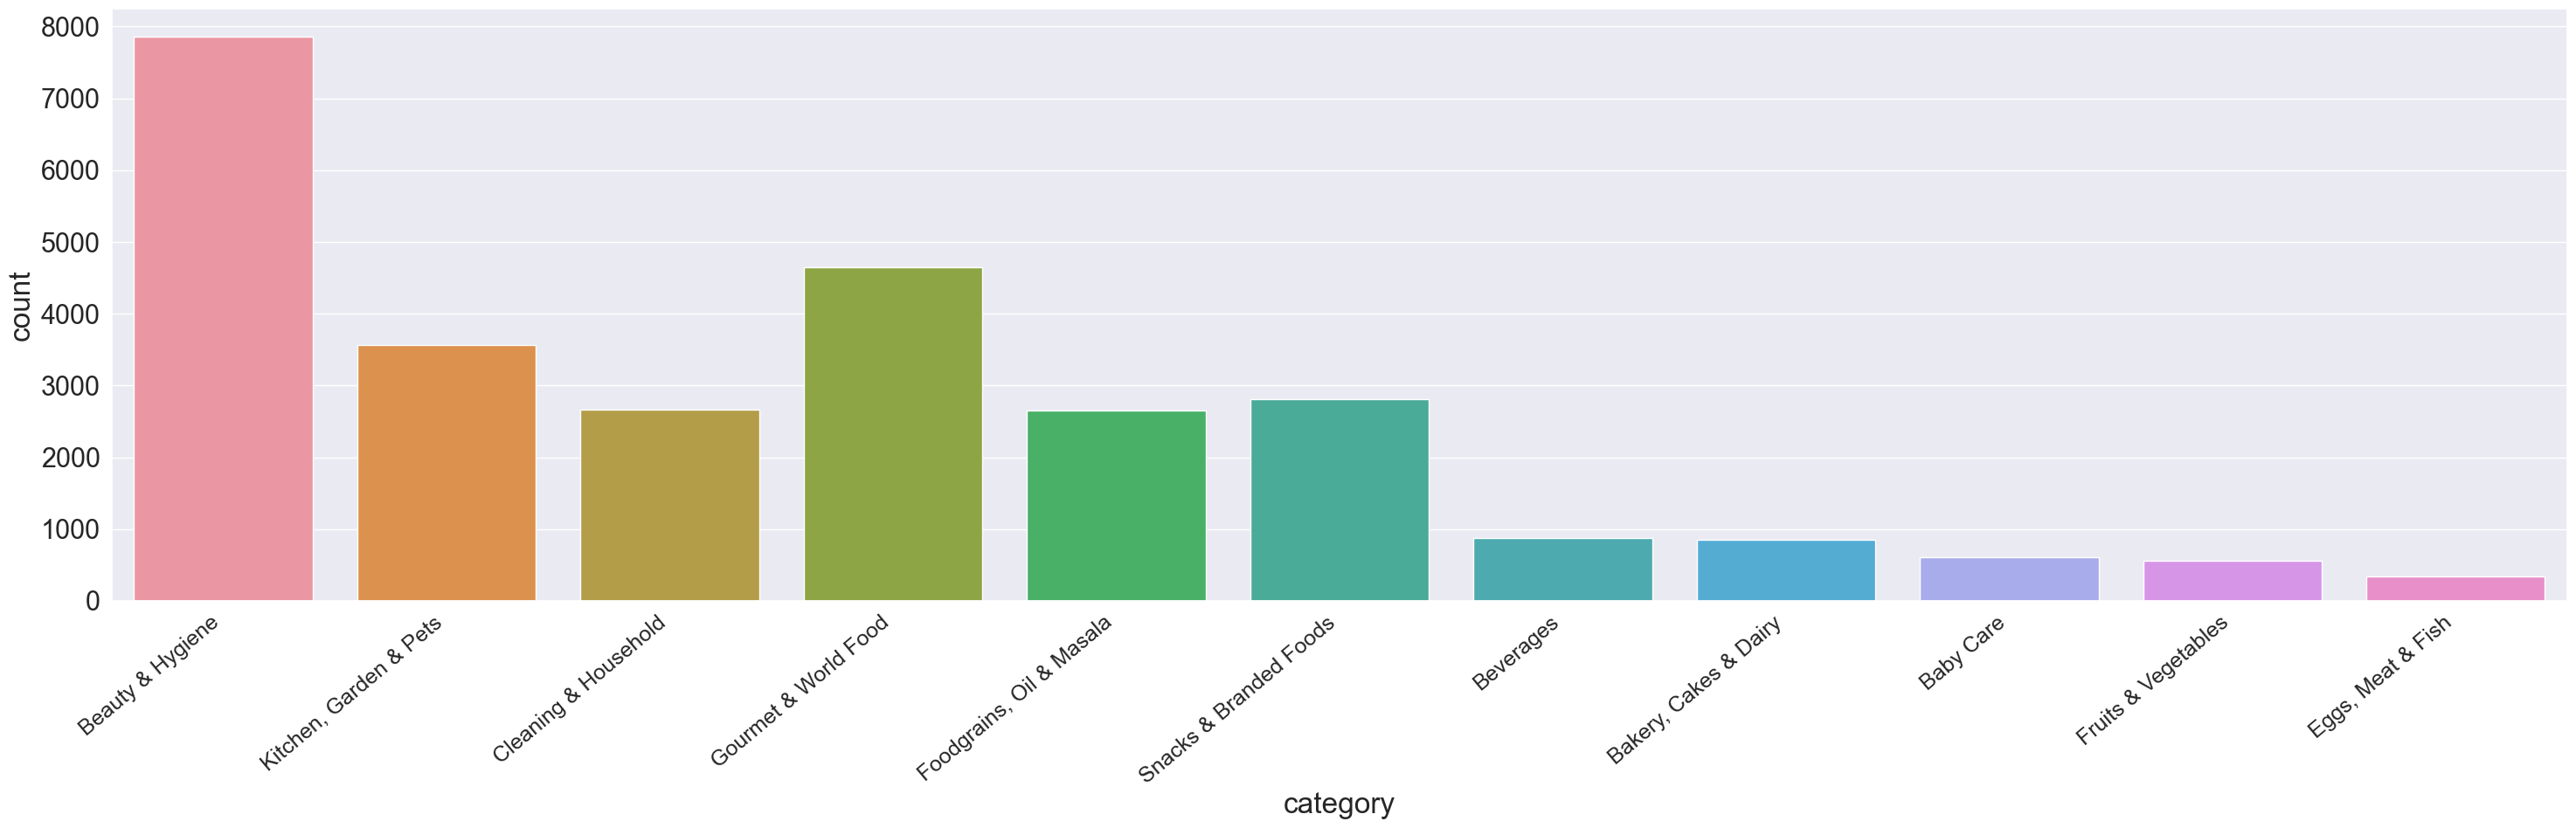

In [23]:
plt.figure(figsize=(30,10))
ax = sns.countplot(x="category", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=18)
plt.tight_layout()
plt.show()

The above countplot provides following observations:
1. Beauty and Hygiene products are most
2. second most sold item is gourmet& world food 
3. Followed by kitchen garden and pets 
4. Bottom two products are Eggs, meat & fish 


In [24]:
top_products = df["product"].value_counts().head(10)

In [25]:
top_products

Turmeric Powder/Arisina Pudi          26
Extra Virgin Olive Oil                15
Cow Ghee/Tuppa                        13
Colorsilk Hair Colour With Keratin    12
Soft Drink                            12
Olive Oil - Extra Virgin              12
Ghee/Tuppa                            11
Coriander Powder                      11
Casting Creme Gloss Hair Color        10
Powder - Coriander                    10
Name: product, dtype: int64

In [26]:
least_products = df['product'].value_counts().tail(10)

In [27]:
least_products

Lavangadi Vati - Respiratory Conditions, 300mg               1
100% Melamine Quadra Chutney Bowl - Black, Green & Yellow    1
Pomegranate - Small                                          1
Butter - Cashew, Smooth                                      1
Panty Liners - Herbs Verbena                                 1
Jamun Vati                                                   1
Drops - Milk Chocolate                                       1
Cooling Mint Body Wash                                       1
Snacks - Cheese Balls, Cheese Flavoured                      1
Green Tea - Pure Original                                    1
Name: product, dtype: int64

In [28]:
top_brand = df['brand'].value_counts().head(10)

In [29]:
top_brand

Fresho              637
bb Royal            539
BB Home             427
DP                  250
Fresho Signature    171
bb Combo            165
Amul                153
INATUR              146
Himalaya            141
Dabur               138
Name: brand, dtype: int64

In [30]:
bottom_brand = df['brand'].value_counts().tail(10)

In [31]:
bottom_brand

Capilano          1
Cosmo             1
Zago              1
Cadburry          1
Clear             1
Unity             1
Mix Box           1
Airific           1
Aeres             1
Baron De Bercy    1
Name: brand, dtype: int64

In [32]:
df['diff_in_prices'] = df['market_price'] - df['sale_price']

In [33]:
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description,missing_rating,diff_in_prices
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,not missing,0.0
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",not missing,0.0
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",not missing,131.0
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,not missing,27.0
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,not missing,0.0


In [34]:
discount = df[df['diff_in_prices']!=0]

In [35]:
discount.shape

(15175, 11)

In [36]:
#discount vs rating

In [37]:
df_impute = df.copy()

In [38]:
le = LabelEncoder()

In [39]:
df_impute['category_le'] = le.fit_transform(df['category']) #creating a new column to replace category with numerical values
df_impute['rating_le'] = df_impute['rating'] #creating a new column for rating to not overwrite the existing one 

In [40]:
impute = IterativeImputer()
df_impute['rating_le'] = impute.fit_transform(df_impute[['rating_le','category_le','sale_price','market_price']])  #Selecting the features to peroform iterative imputation 
df_impute['rating_le'].isnull().sum()

0

In [41]:
df_impute.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description,missing_rating,diff_in_prices,category_le,rating_le
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,not missing,0.0,2,4.1
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",not missing,0.0,9,2.3
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",not missing,131.0,4,3.4
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,not missing,27.0,4,3.7
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,not missing,0.0,2,4.4


In [42]:
df_impute.groupby('category')['rating_le'].mean()

category
Baby Care                   4.004959
Bakery, Cakes & Dairy       3.927186
Beauty & Hygiene            3.923198
Beverages                   4.048118
Cleaning & Household        3.954110
Eggs, Meat & Fish           3.948692
Foodgrains, Oil & Masala    4.037813
Fruits & Vegetables         3.970274
Gourmet & World Food        3.954123
Kitchen, Garden & Pets      3.773846
Snacks & Branded Foods      3.977573
Name: rating_le, dtype: float64

In [43]:
knn_impute = df.copy()

In [44]:
knn_impute['category_le'] = le.fit_transform(df['category'])
knn_impute['rating_le'] = df_impute['rating']

In [45]:
knn_impute['rating_le'].isnull().sum()

8599

In [46]:
impute_knn = KNNImputer(n_neighbors=3)
knn_impute[['category_le','rating_le','sale_price','market_price']] = impute_knn.fit_transform(knn_impute[['category_le','rating_le','sale_price','market_price']])

In [47]:
knn_impute[['category_le','rating_le','sale_price','market_price']].isnull().sum()

category_le     0
rating_le       0
sale_price      0
market_price    0
dtype: int64

In [48]:
knn_impute.groupby('category')['rating_le'].mean()

category
Baby Care                   3.992885
Bakery, Cakes & Dairy       3.921191
Beauty & Hygiene            3.899173
Beverages                   4.030344
Cleaning & Household        3.950444
Eggs, Meat & Fish           4.017151
Foodgrains, Oil & Masala    4.040163
Fruits & Vegetables         4.106715
Gourmet & World Food        3.968697
Kitchen, Garden & Pets      3.765703
Snacks & Branded Foods      3.979512
Name: rating_le, dtype: float64

In [49]:
new_df = knn_impute.drop(['rating','missing_rating'],axis=1)

In [50]:
new_df.isnull().sum()

product           0
category          0
sub_category      0
brand             0
sale_price        0
market_price      0
type              0
description       0
diff_in_prices    0
category_le       0
rating_le         0
dtype: int64

In [51]:
train_set, test_set = train_test_split(new_df,test_size = 0.2,random_state=42)

In [52]:
analysis = new_df.copy()

In [53]:
analysis.drop(['category_le'],axis=1,inplace=True)
analysis.describe()

,sale_price,market_price,diff_in_prices,rating_le
count,27439.000000,27439.000000,27439.00000,27439.000000
mean,322.701129,382.238589,59.53746,3.933138
std,486.857214,581.866963,169.14659,0.689999
min,2.450000,3.000000,0.00000,1.000000
25%,95.000000,100.000000,0.00000,3.700000
50%,190.000000,220.000000,6.00000,4.100000
75%,359.000000,425.000000,51.00000,4.300000
max,12500.000000,12500.000000,4320.00000,5.000000


In [54]:
features = analysis[['sale_price','market_price','rating_le']]

In [55]:
features.head()

,sale_price,market_price,rating_le
0,220.0,220.0,4.1
1,180.0,180.0,2.3
2,119.0,250.0,3.4
3,149.0,176.0,3.7
4,162.0,162.0,4.4


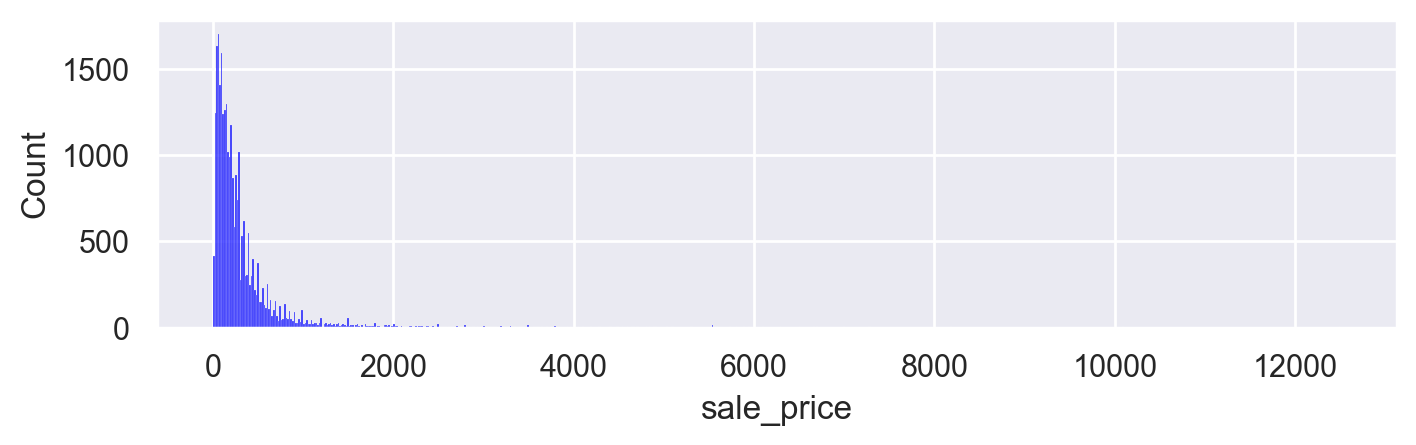

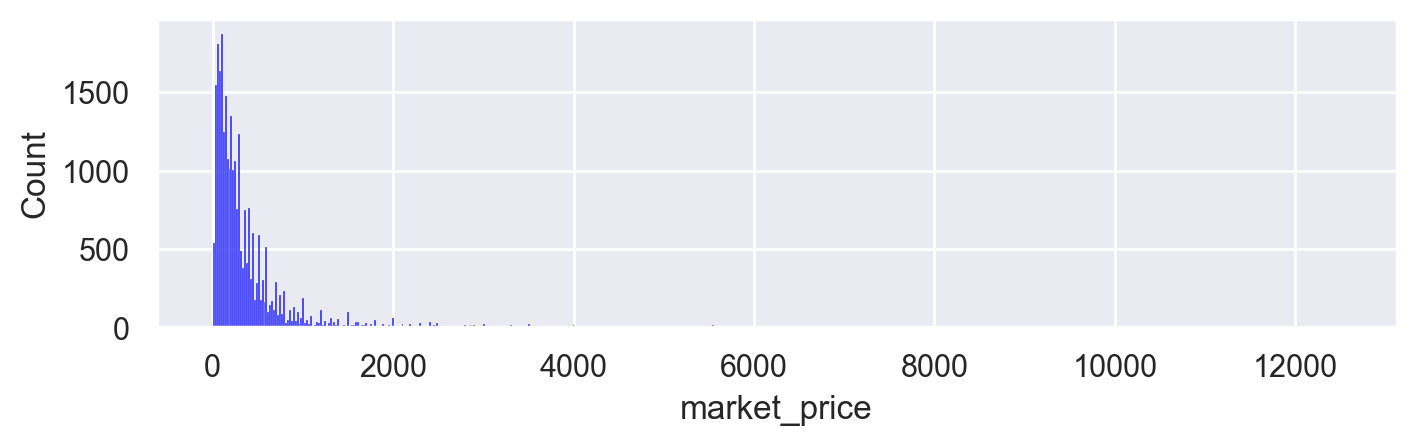

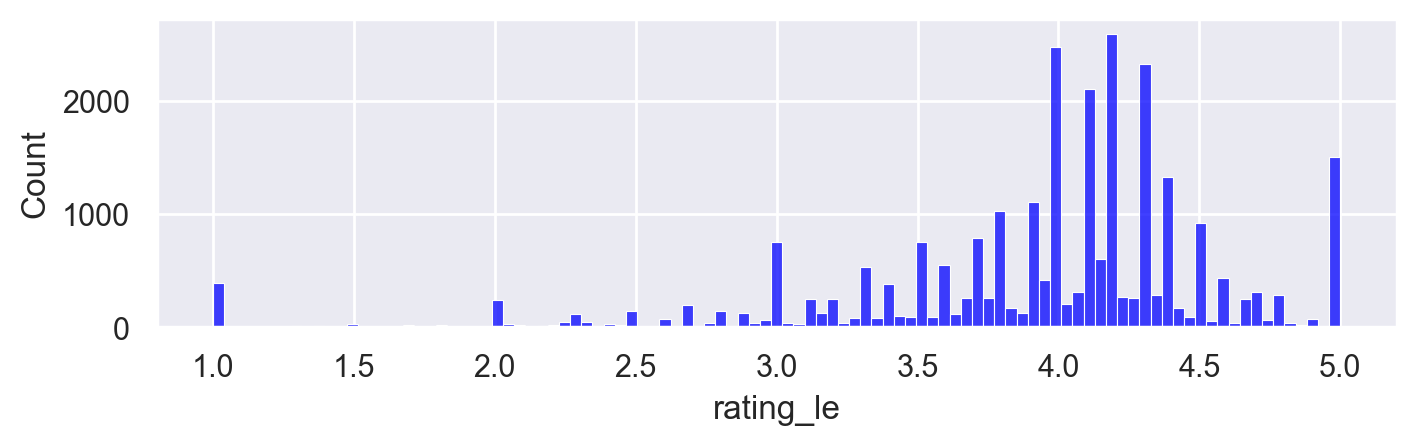

In [56]:
for i,col in enumerate(features.columns):
    plt.figure(figsize=(8,2),dpi=200)
    sns.set_style("dark")
    sns.set(font_scale=1)
    sns.histplot(x=col,data=analysis,color = 'blue')

<AxesSubplot: >

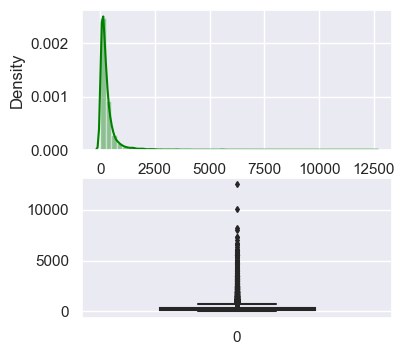

In [57]:
plt.figure(figsize=(4,4))
plt.subplot(2,1,1)
sns.set(font_scale=1)
sns.distplot(analysis['sale_price'],hist=True,color='green')
plt.subplot(2,1,2)
sns.set(font_scale=1)
sns.boxplot(analysis['sale_price'],color='green',saturation=0.75,width=0.5,fliersize =3)

<AxesSubplot: >

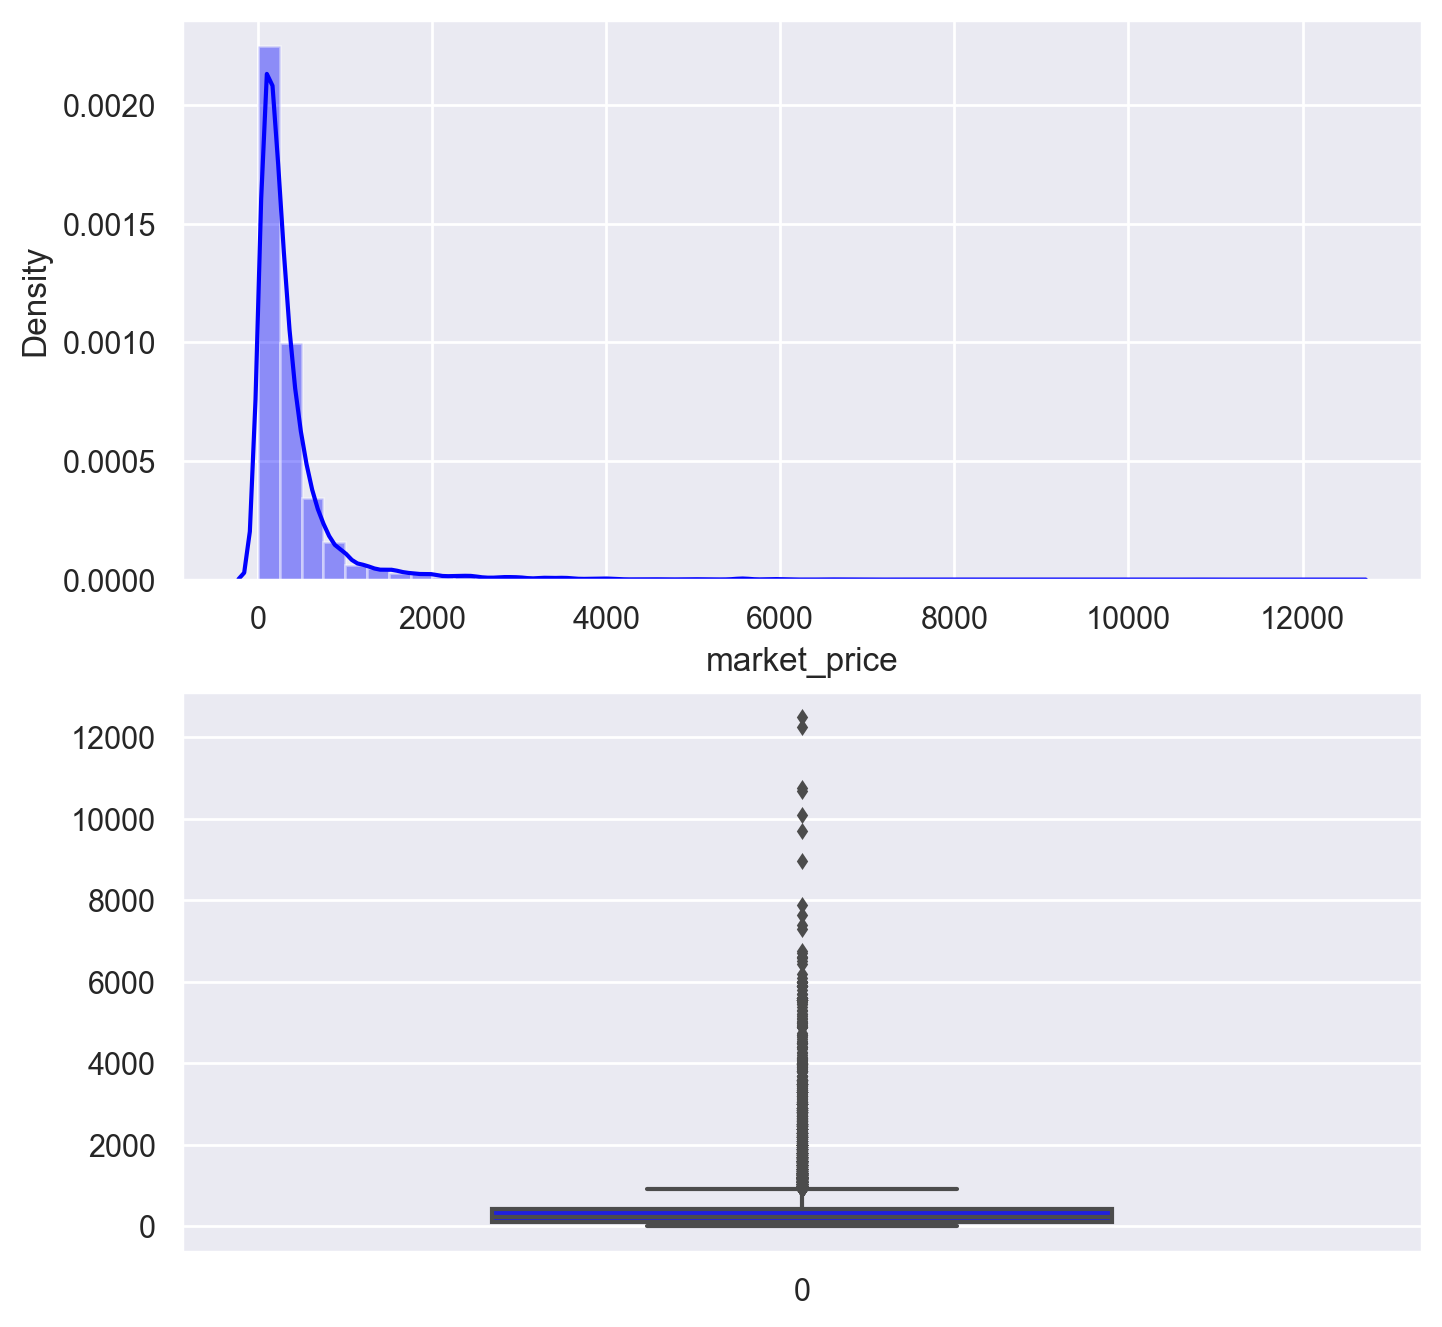

In [58]:
plt.figure(figsize=(8,8),dpi=200)
plt.subplot(2,1,1)
sns.set(font_scale=1)
sns.distplot(analysis['market_price'],hist=True,color='blue')
plt.subplot(2,1,2)
sns.set(font_scale=1)
sns.boxplot(analysis['market_price'],color='blue',saturation=0.75,width=0.5,fliersize =3)

In [59]:
for x in analysis.columns:
    if analysis[x].dtypes == object:
        print(f"The number of unique values in {x} is {analysis[x].nunique()}")

The number of unique values in product is 23449
The number of unique values in category is 11
The number of unique values in sub_category is 90
The number of unique values in brand is 2309
The number of unique values in type is 426
The number of unique values in description is 21943


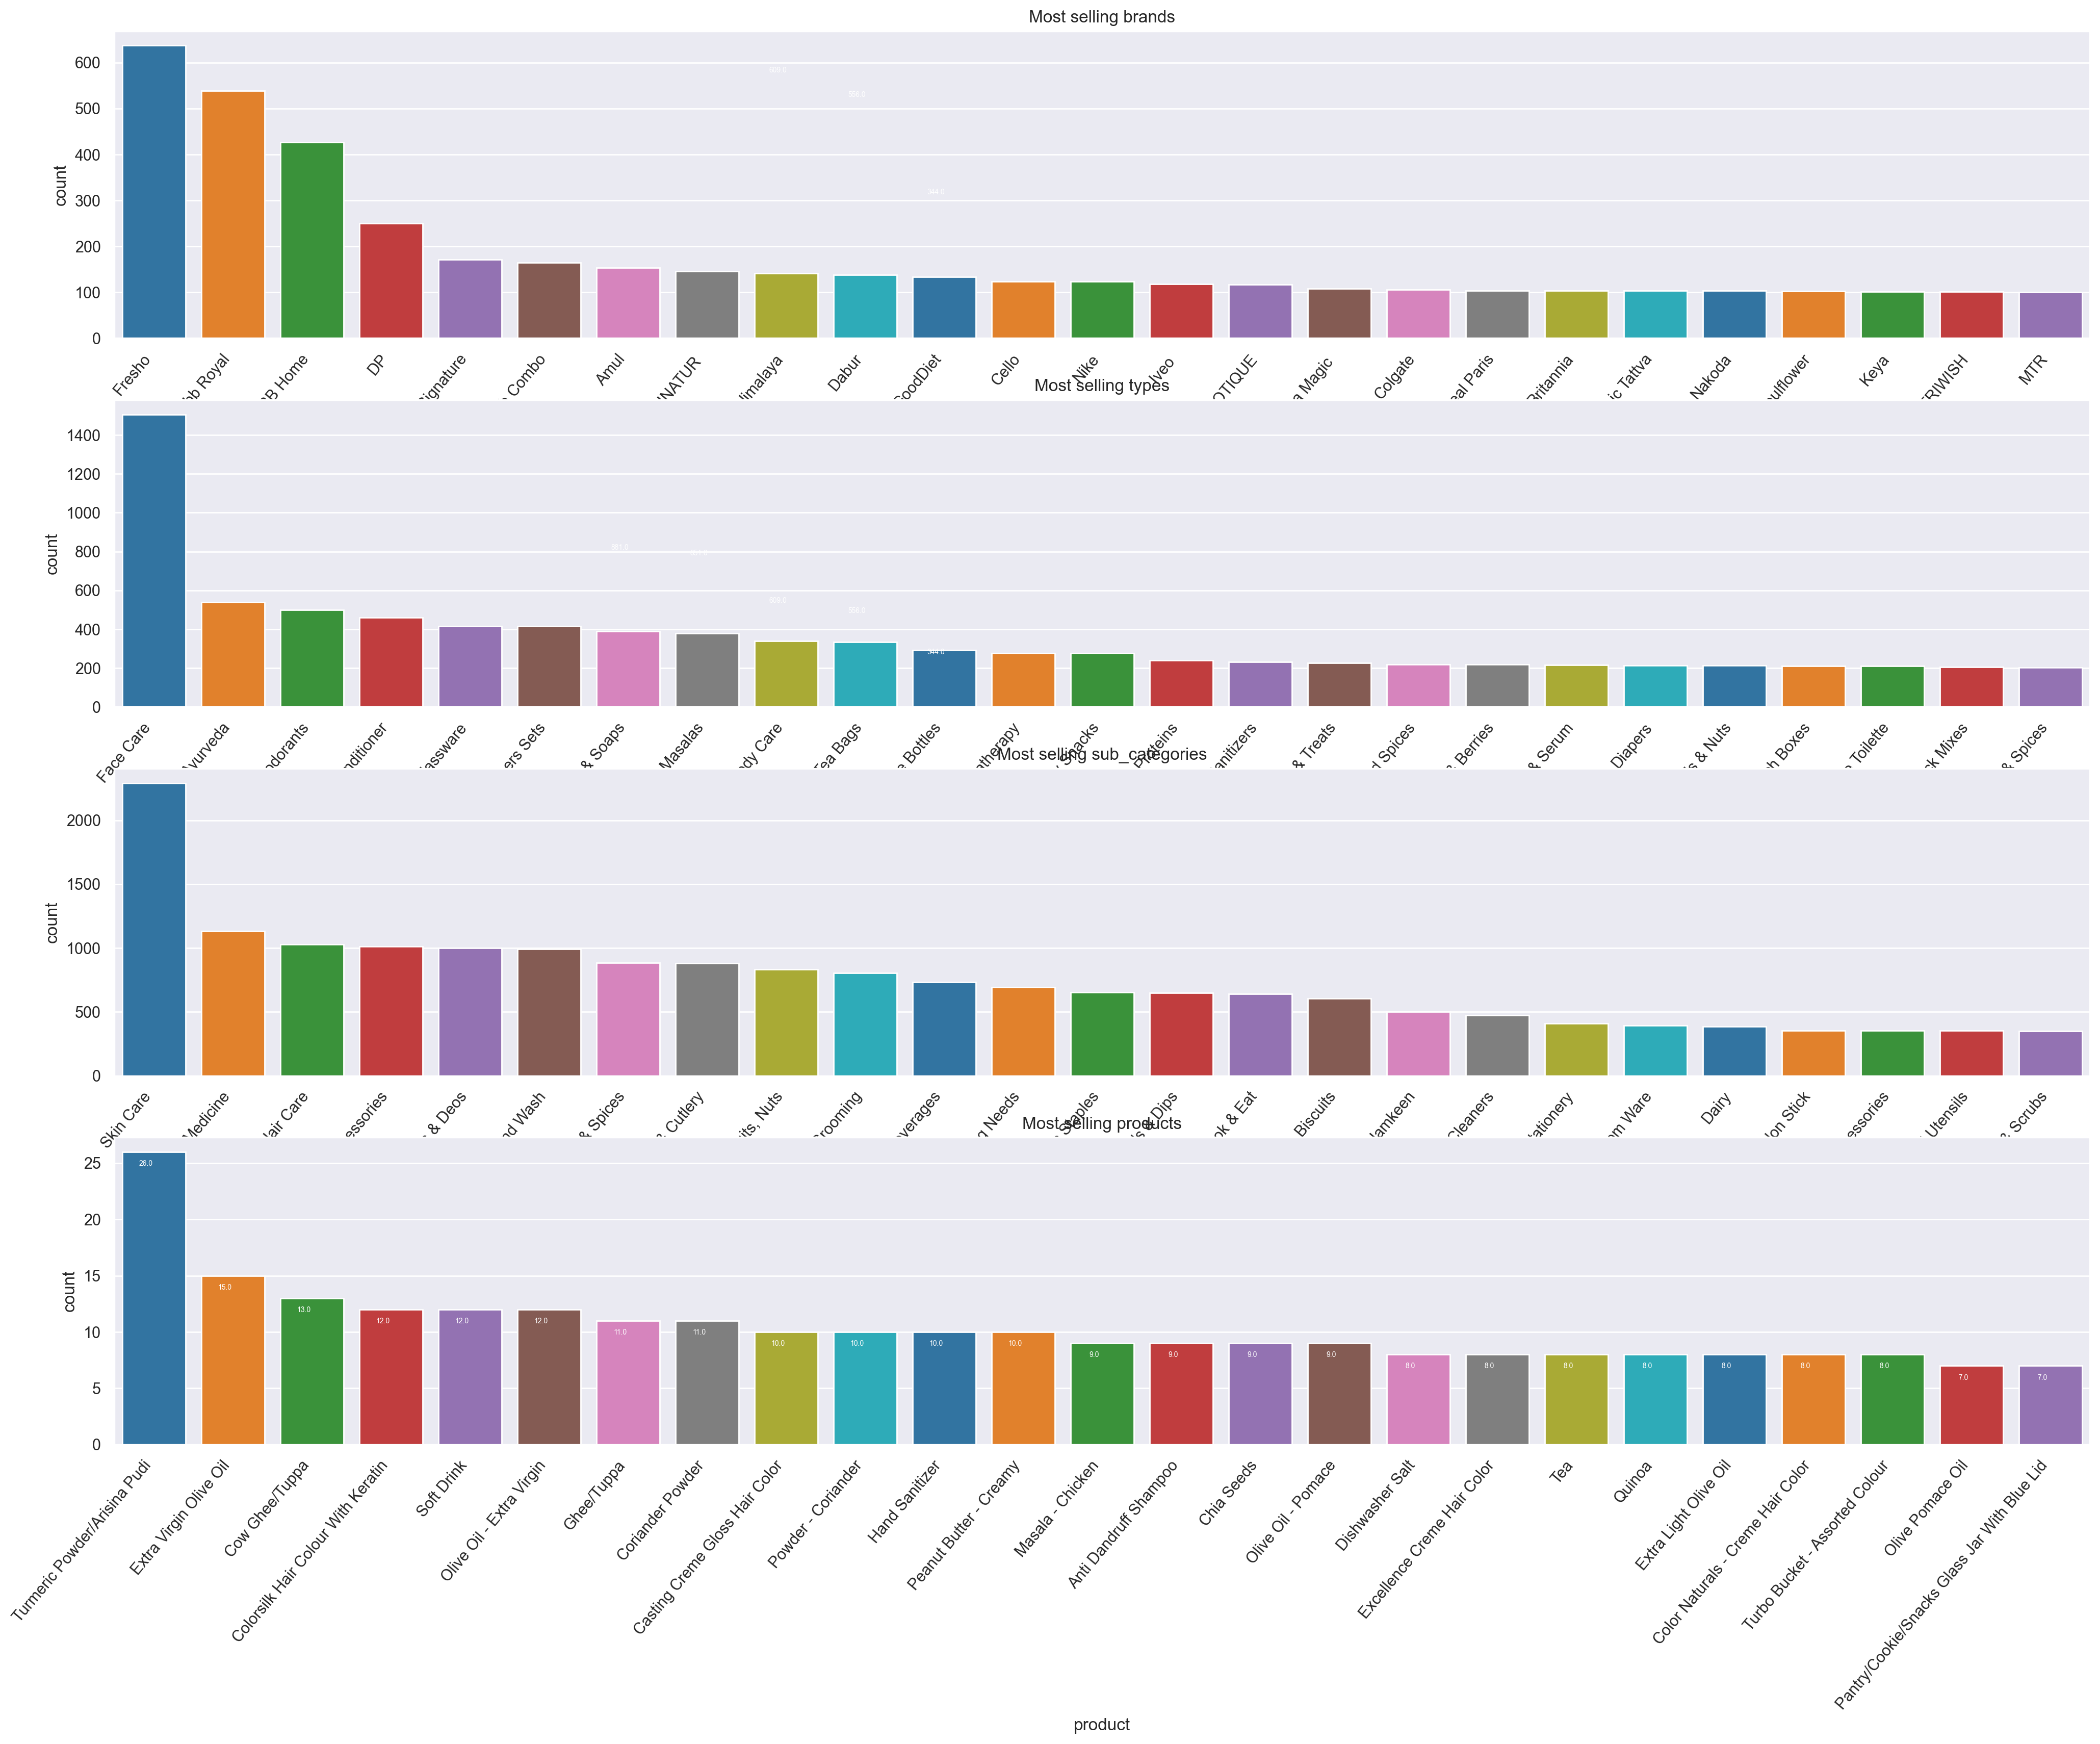

In [60]:
plt.figure(figsize=(25, 18), dpi=200)

plt.subplot(4,1,1)
ax1 = sns.countplot(data=analysis,x=analysis['brand'],order=analysis['brand'].value_counts().iloc[:25].index,palette='tab10')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=50,horizontalalignment='right')
ax1.set_title('Most selling brands', fontsize=12)
for p in ax.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=5)


plt.subplot(4,1,2)
ax2 = sns.countplot(data=analysis,x=analysis['type'],order=analysis['type'].value_counts().iloc[:25].index,palette='tab10')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=50,horizontalalignment='right')
ax2.set_title('Most selling types', fontsize=12)
for p in ax.patches:
    ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=5)

plt.subplot(4,1,3)
ax3 = sns.countplot(data=analysis,x=analysis['sub_category'],order=analysis['sub_category'].value_counts().iloc[:25].index,palette='tab10')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=50,horizontalalignment='right')
ax3.set_title('Most selling sub_categories', fontsize=12)
for p in ax3.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=5)


plt.subplot(4,1,4)
ax4 = sns.countplot(data=analysis,x=analysis['product'],order=analysis['product'].value_counts().iloc[:25].index,palette='tab10')
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=50,horizontalalignment='right')
ax4.set_title('Most selling products', fontsize=12)
for p in ax4.patches:
    ax4.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='white', size=5)

plt.show()

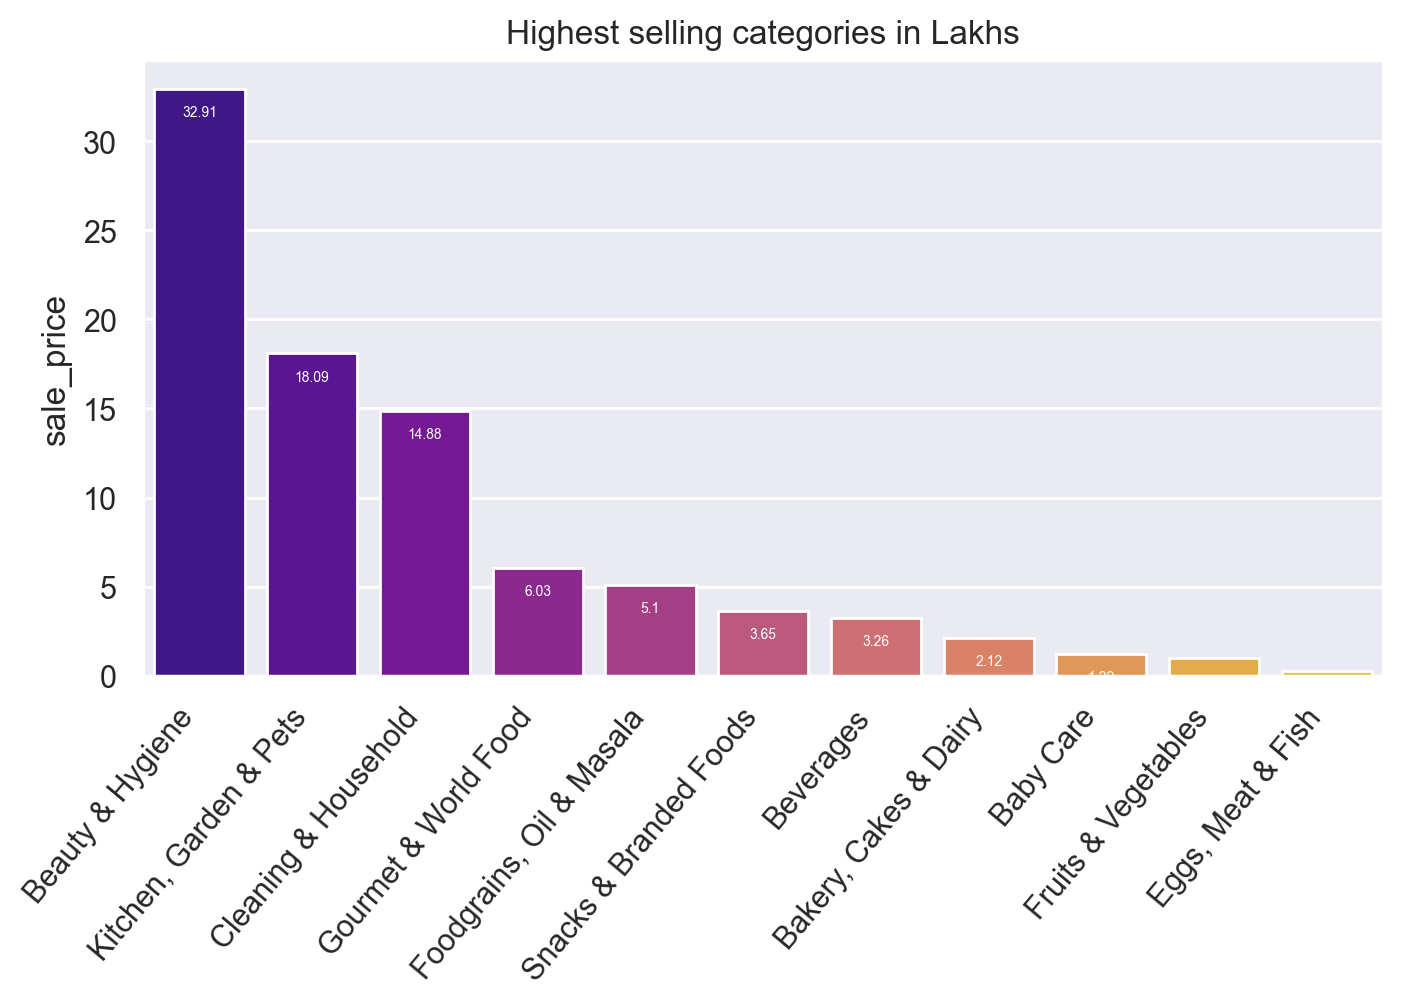

In [61]:
plt.figure(figsize=(8,4),dpi=200)
ax = sns.barplot(data=analysis,x=analysis['category'].unique(),y=(analysis.groupby('category')['sale_price'].sum()/100000).sort_values(ascending=False),palette='plasma')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, horizontalalignment='right')
ax.set_title('Highest selling categories in Lakhs', fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height(),2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='White', size=5)
plt.show()

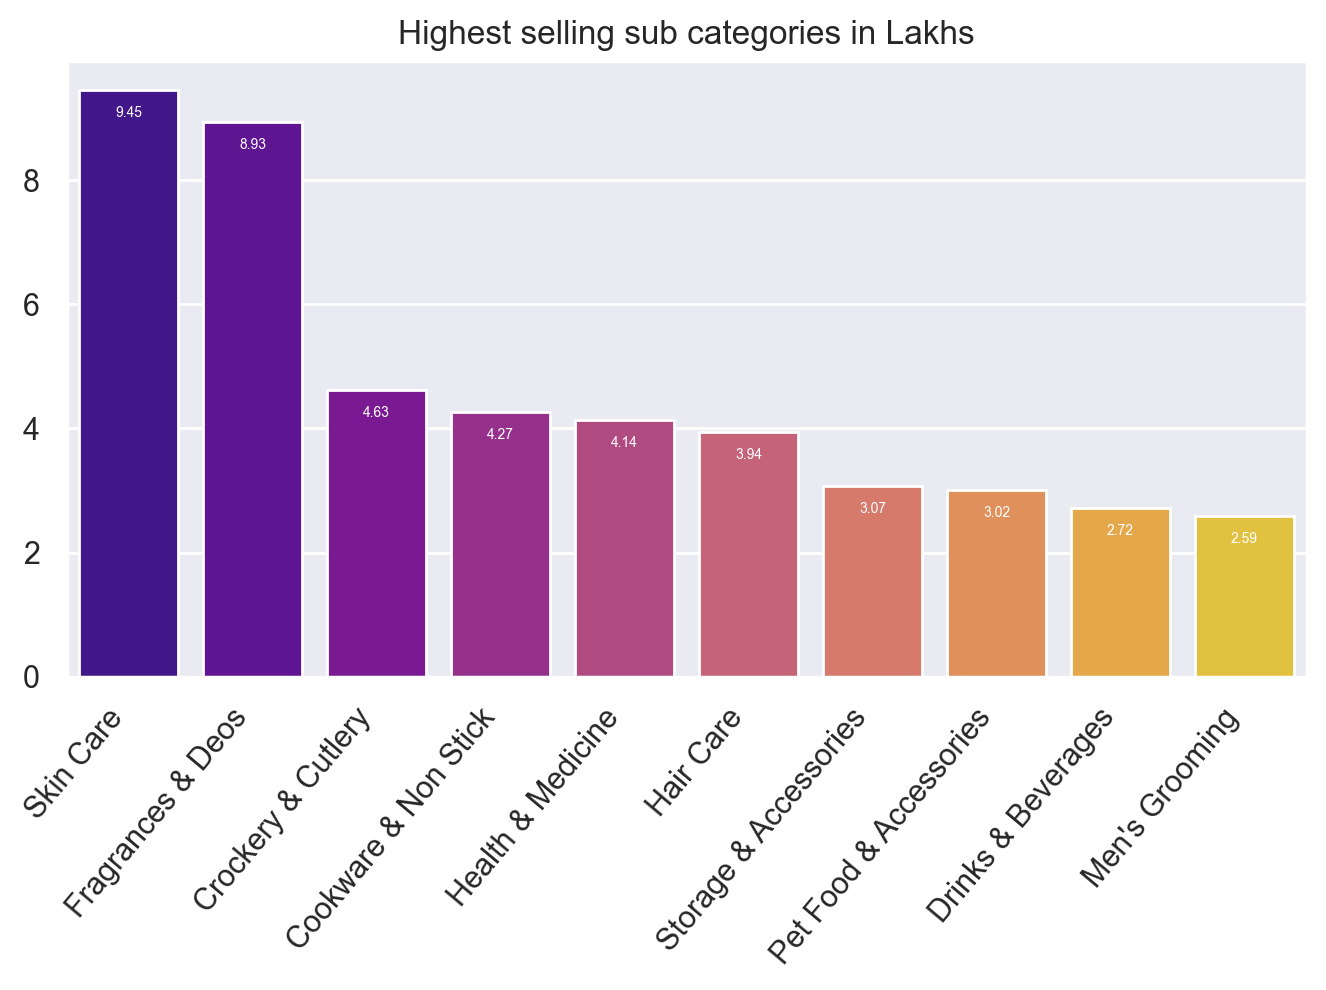

In [62]:
agg_data = (analysis.groupby('sub_category')['sale_price'].sum()/100000).sort_values(ascending=False)
x = np.array(agg_data.index)
y = np.array(agg_data.values)

plt.figure(figsize=(8,4),dpi=200)
ax = sns.barplot(data=df,
                 x=x[:10],
                 y=y[:10],
                 palette='plasma')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, horizontalalignment='right')
ax.set_title('Highest selling sub categories in Lakhs', fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height(),2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=5)
plt.show()

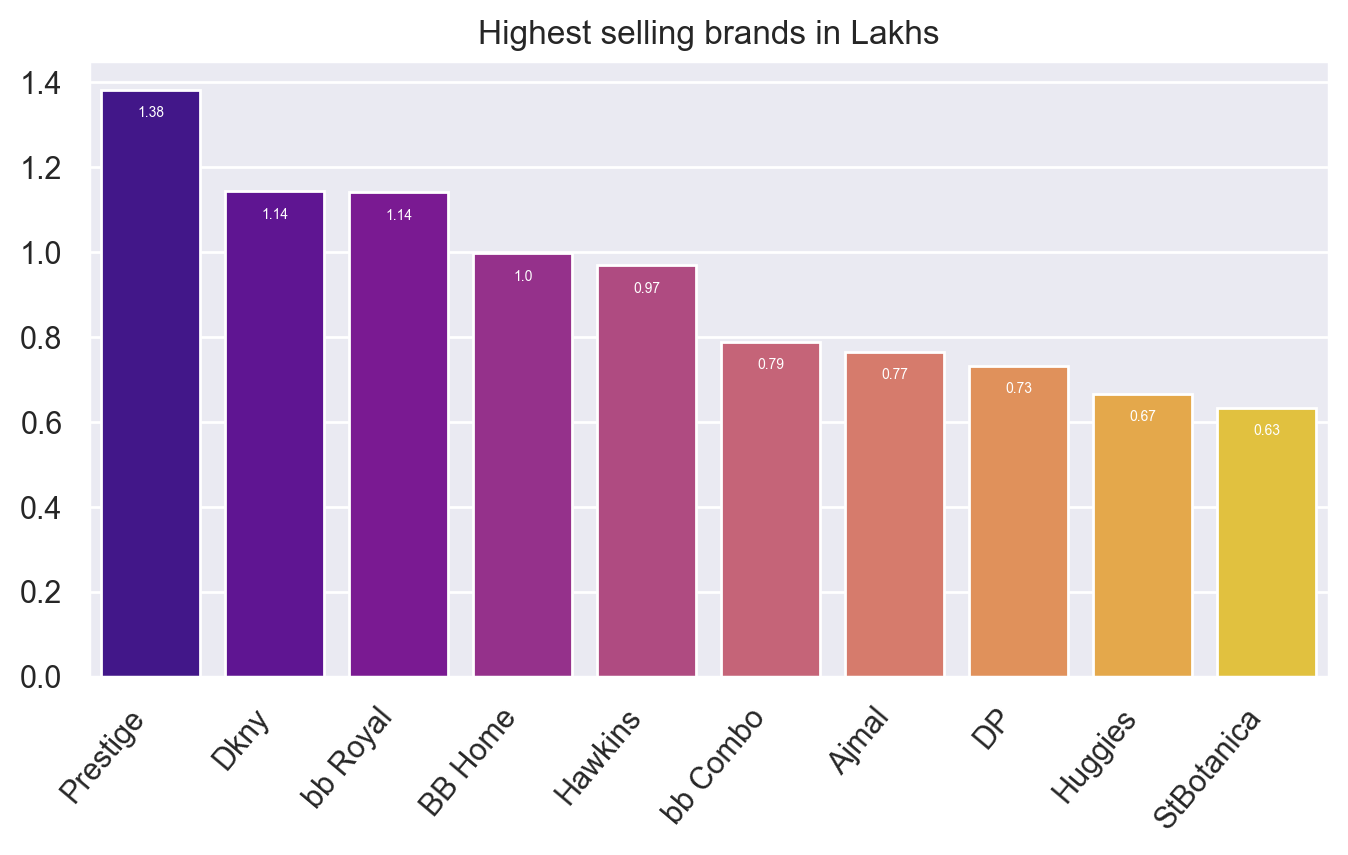

In [63]:
agg_data = (analysis.groupby('brand')['sale_price'].sum()/100000).sort_values(ascending=False)
x = np.array(agg_data.index)
y = np.array(agg_data.values)

plt.figure(figsize=(8,4),dpi=200)
ax = sns.barplot(data=df,
                 x=x[:10],
                 y=y[:10],
                 palette='plasma')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, horizontalalignment='right')
ax.set_title('Highest selling brands in Lakhs', fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height(),2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=5)
plt.show()

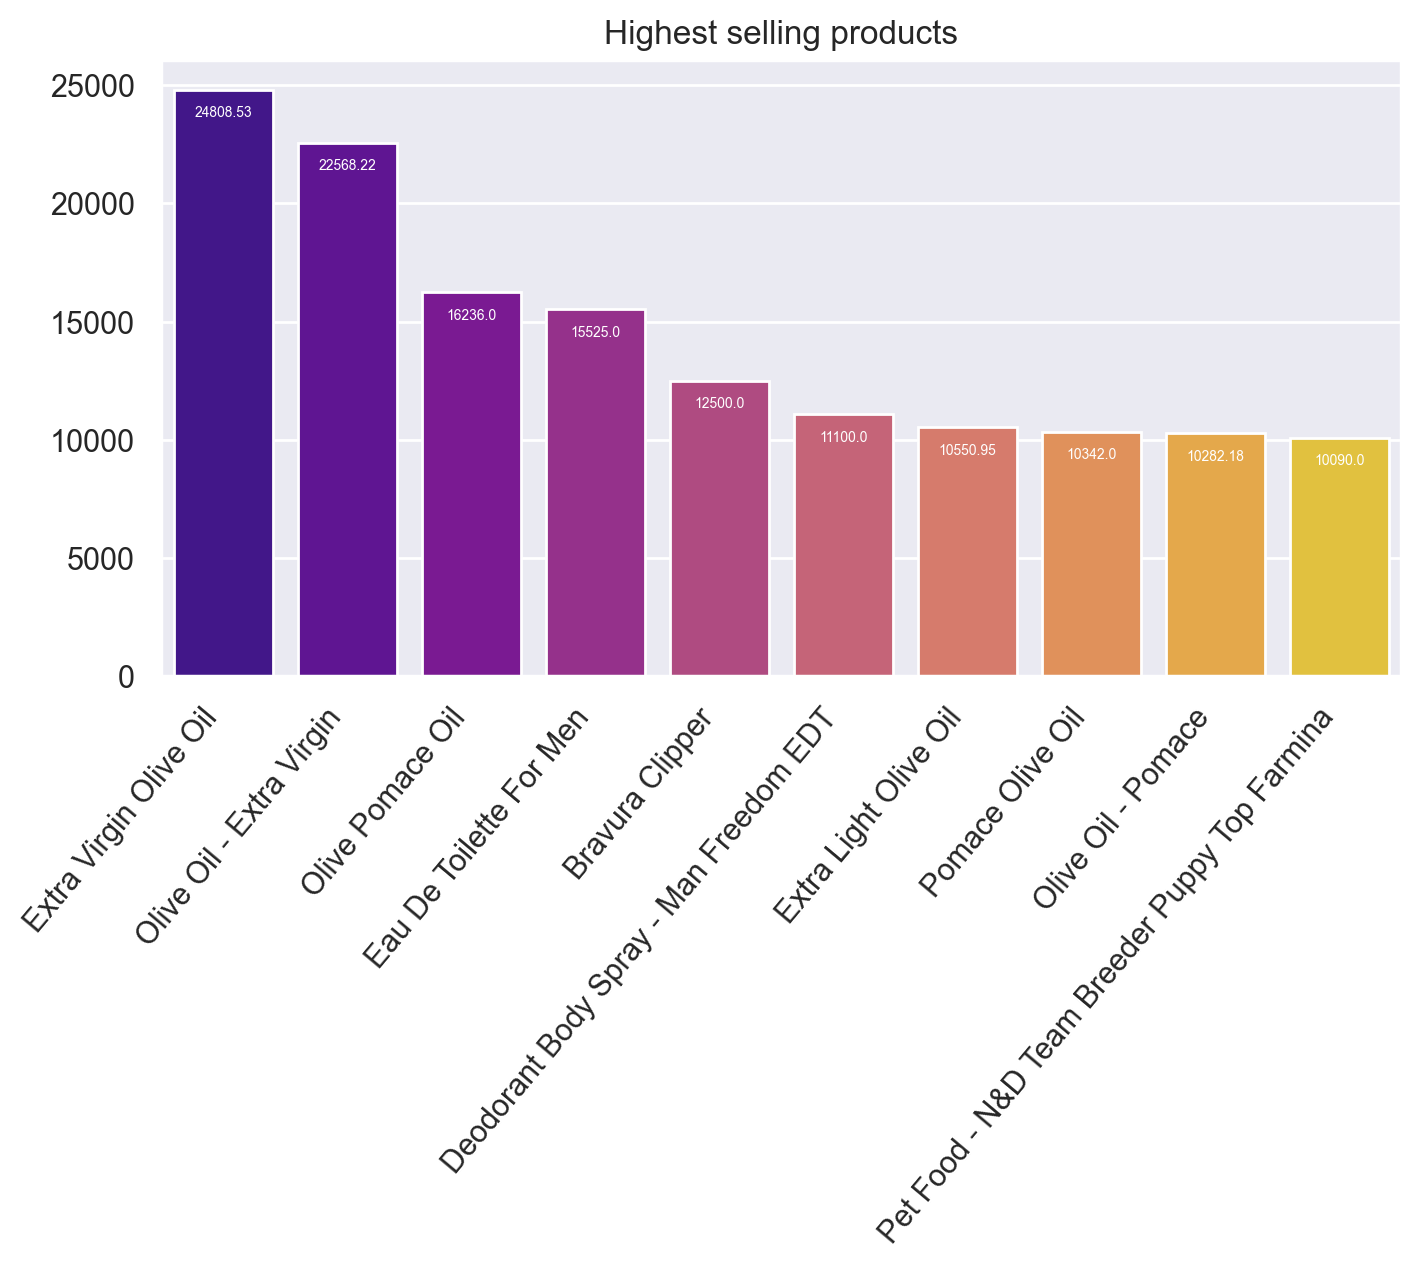

In [64]:
agg_data = (analysis.groupby('product')['sale_price'].sum()).sort_values(ascending=False)
x = np.array(agg_data.index)
y = np.array(agg_data.values)

plt.figure(figsize=(8,4),dpi=200)
ax = sns.barplot(data=analysis,
                 x=x[:10],
                 y=y[:10],
                 palette='plasma')
ax.set_xticklabels(ax.get_xticklabels(),rotation=50, horizontalalignment='right')
ax.set_title('Highest selling products', fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{np.round(p.get_height(),2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=5)
plt.show()

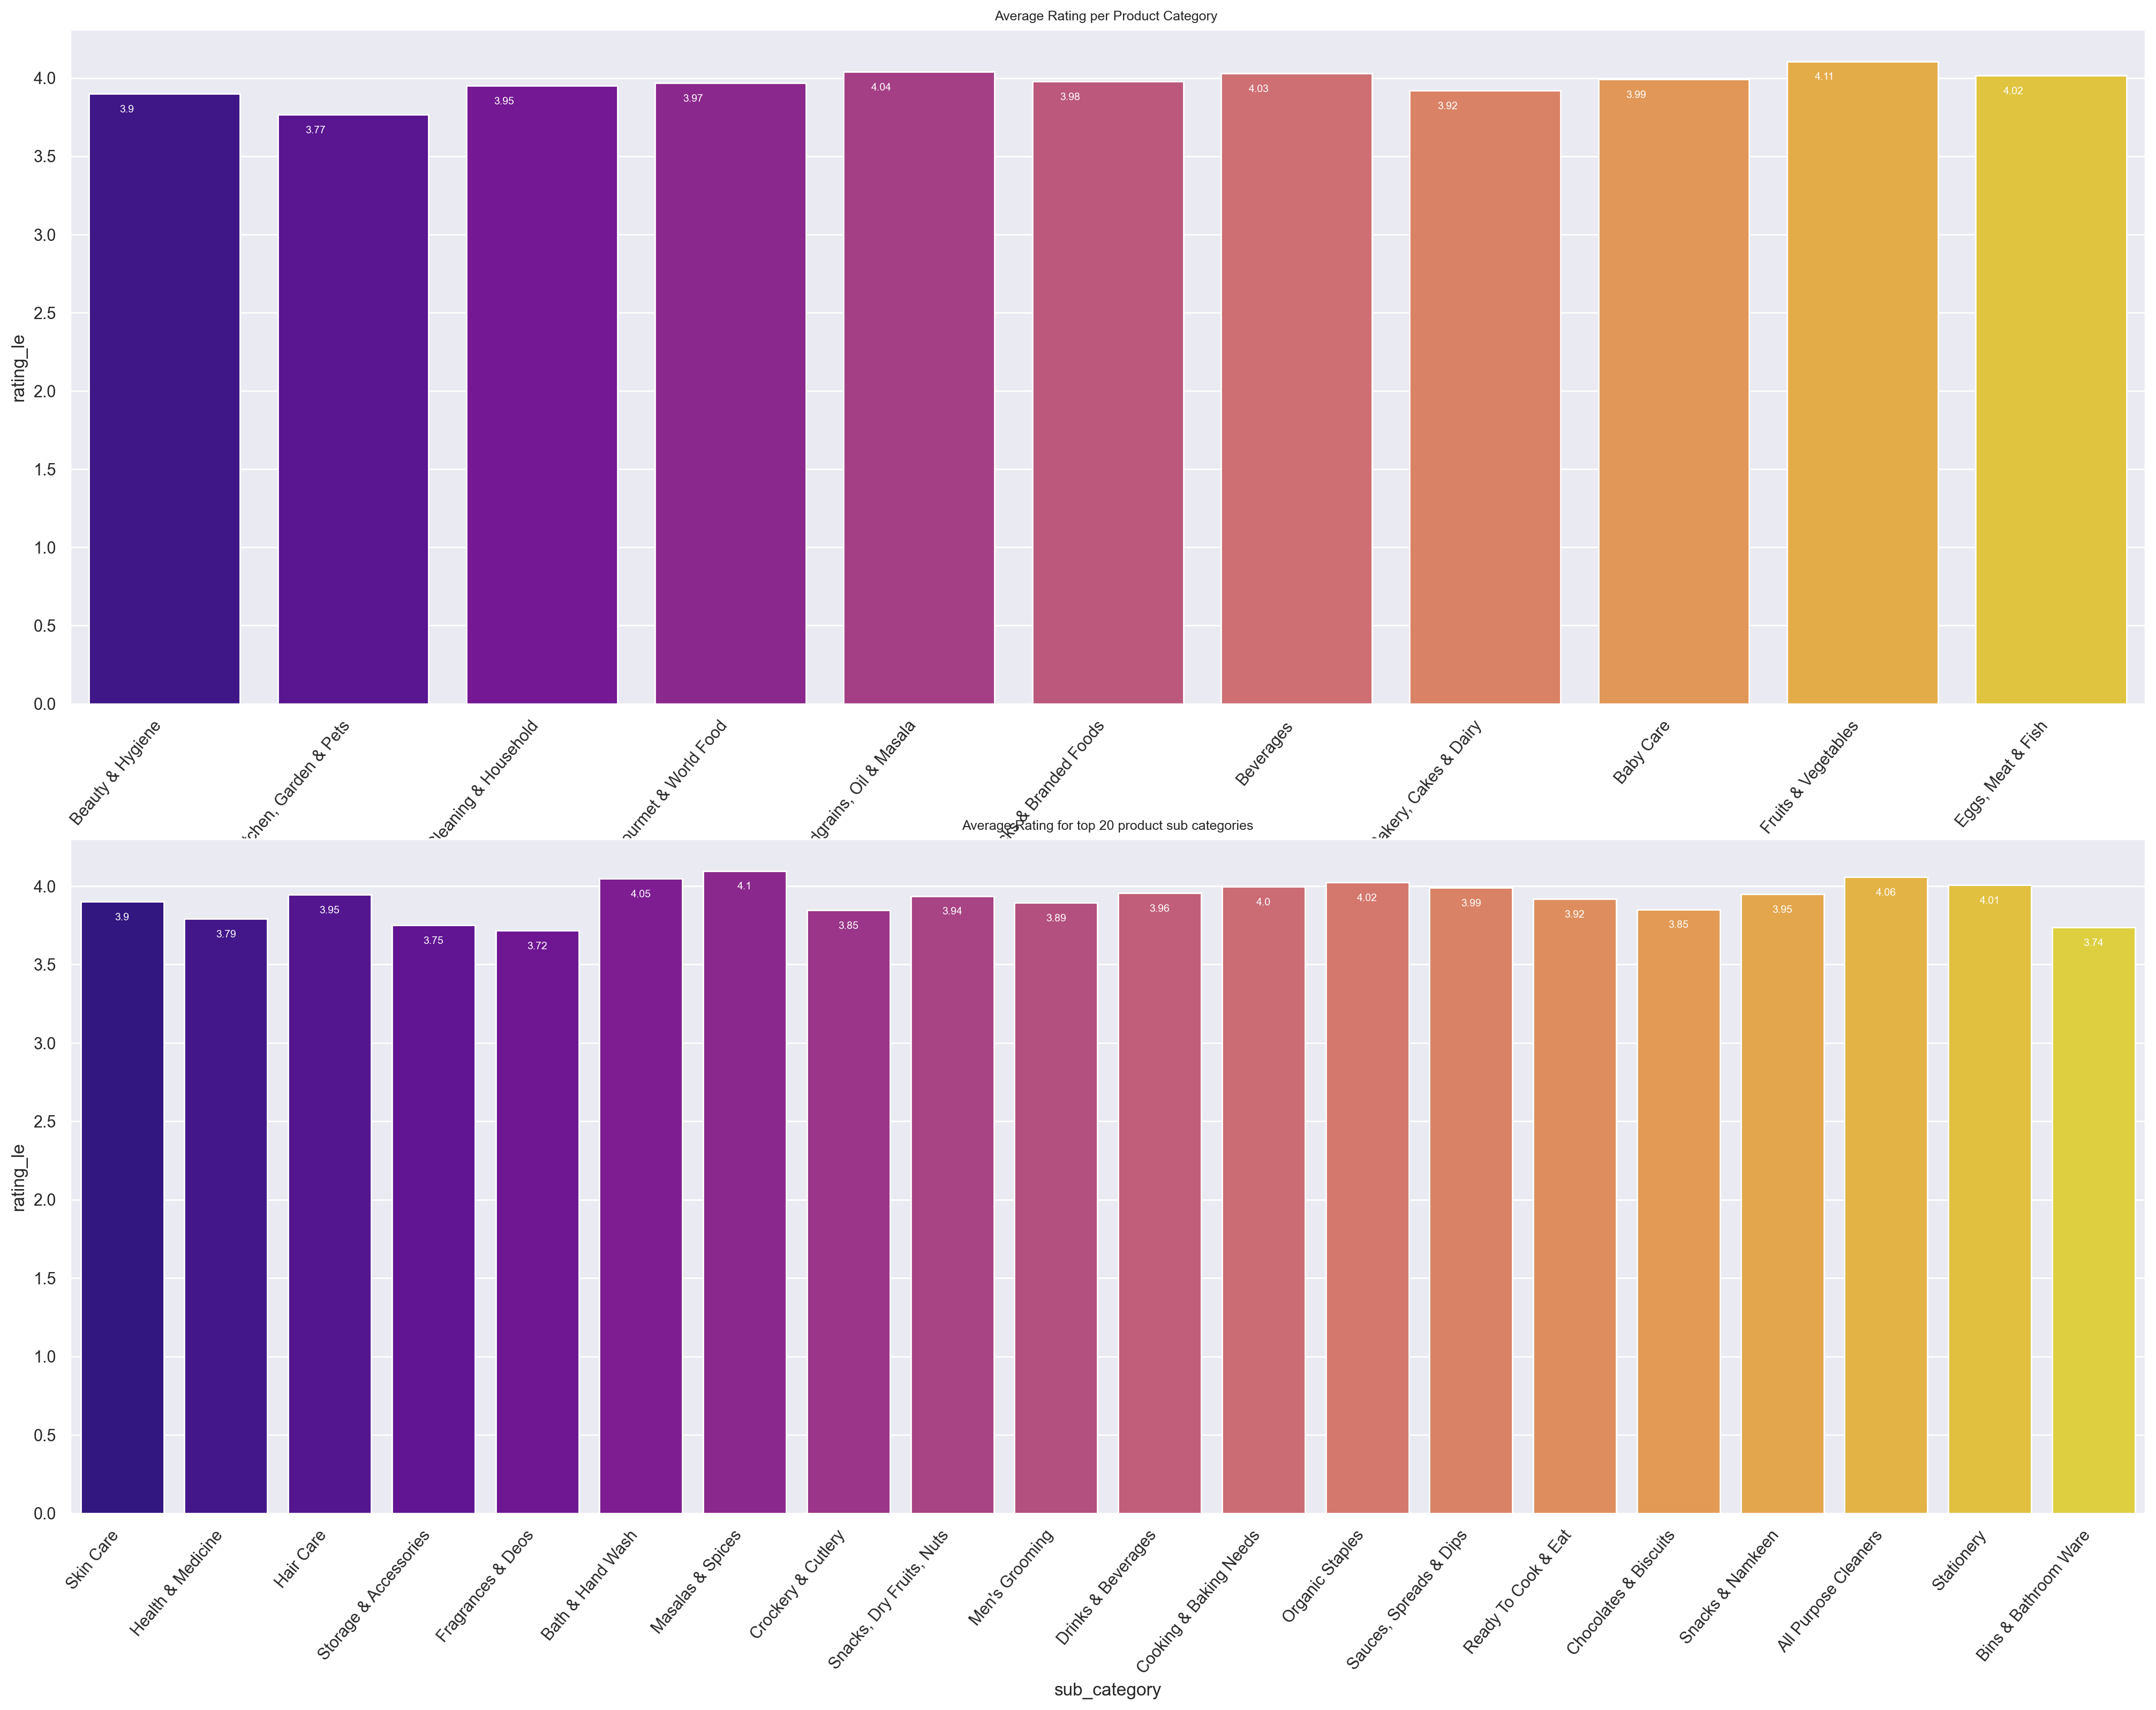

In [65]:
plt.figure(figsize=(25,18),dpi=200)

plt.subplot(2,1,1)
ax1 = sns.barplot(data=analysis,x=analysis['category'],y=analysis['rating_le'],palette='plasma',ci=None)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=50, horizontalalignment='right')
ax1.set_title('Average Rating per Product Category ', fontsize=9)
for p in ax1.patches:
    ax1.annotate(f'\n{np.round(p.get_height(),2)}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=7)


plt.subplot(2,1,2)
ax2 = sns.barplot(data=analysis,x=analysis['sub_category'],y=analysis['rating_le'],palette='plasma',order=analysis['sub_category'].value_counts().iloc[:20].index,ci=None)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=50, horizontalalignment='right')
ax2.set_title('Average Rating for top 20 product sub categories', fontsize=9)
for p in ax2.patches:
    ax2.annotate(f'\n{np.round(p.get_height(),2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=7)

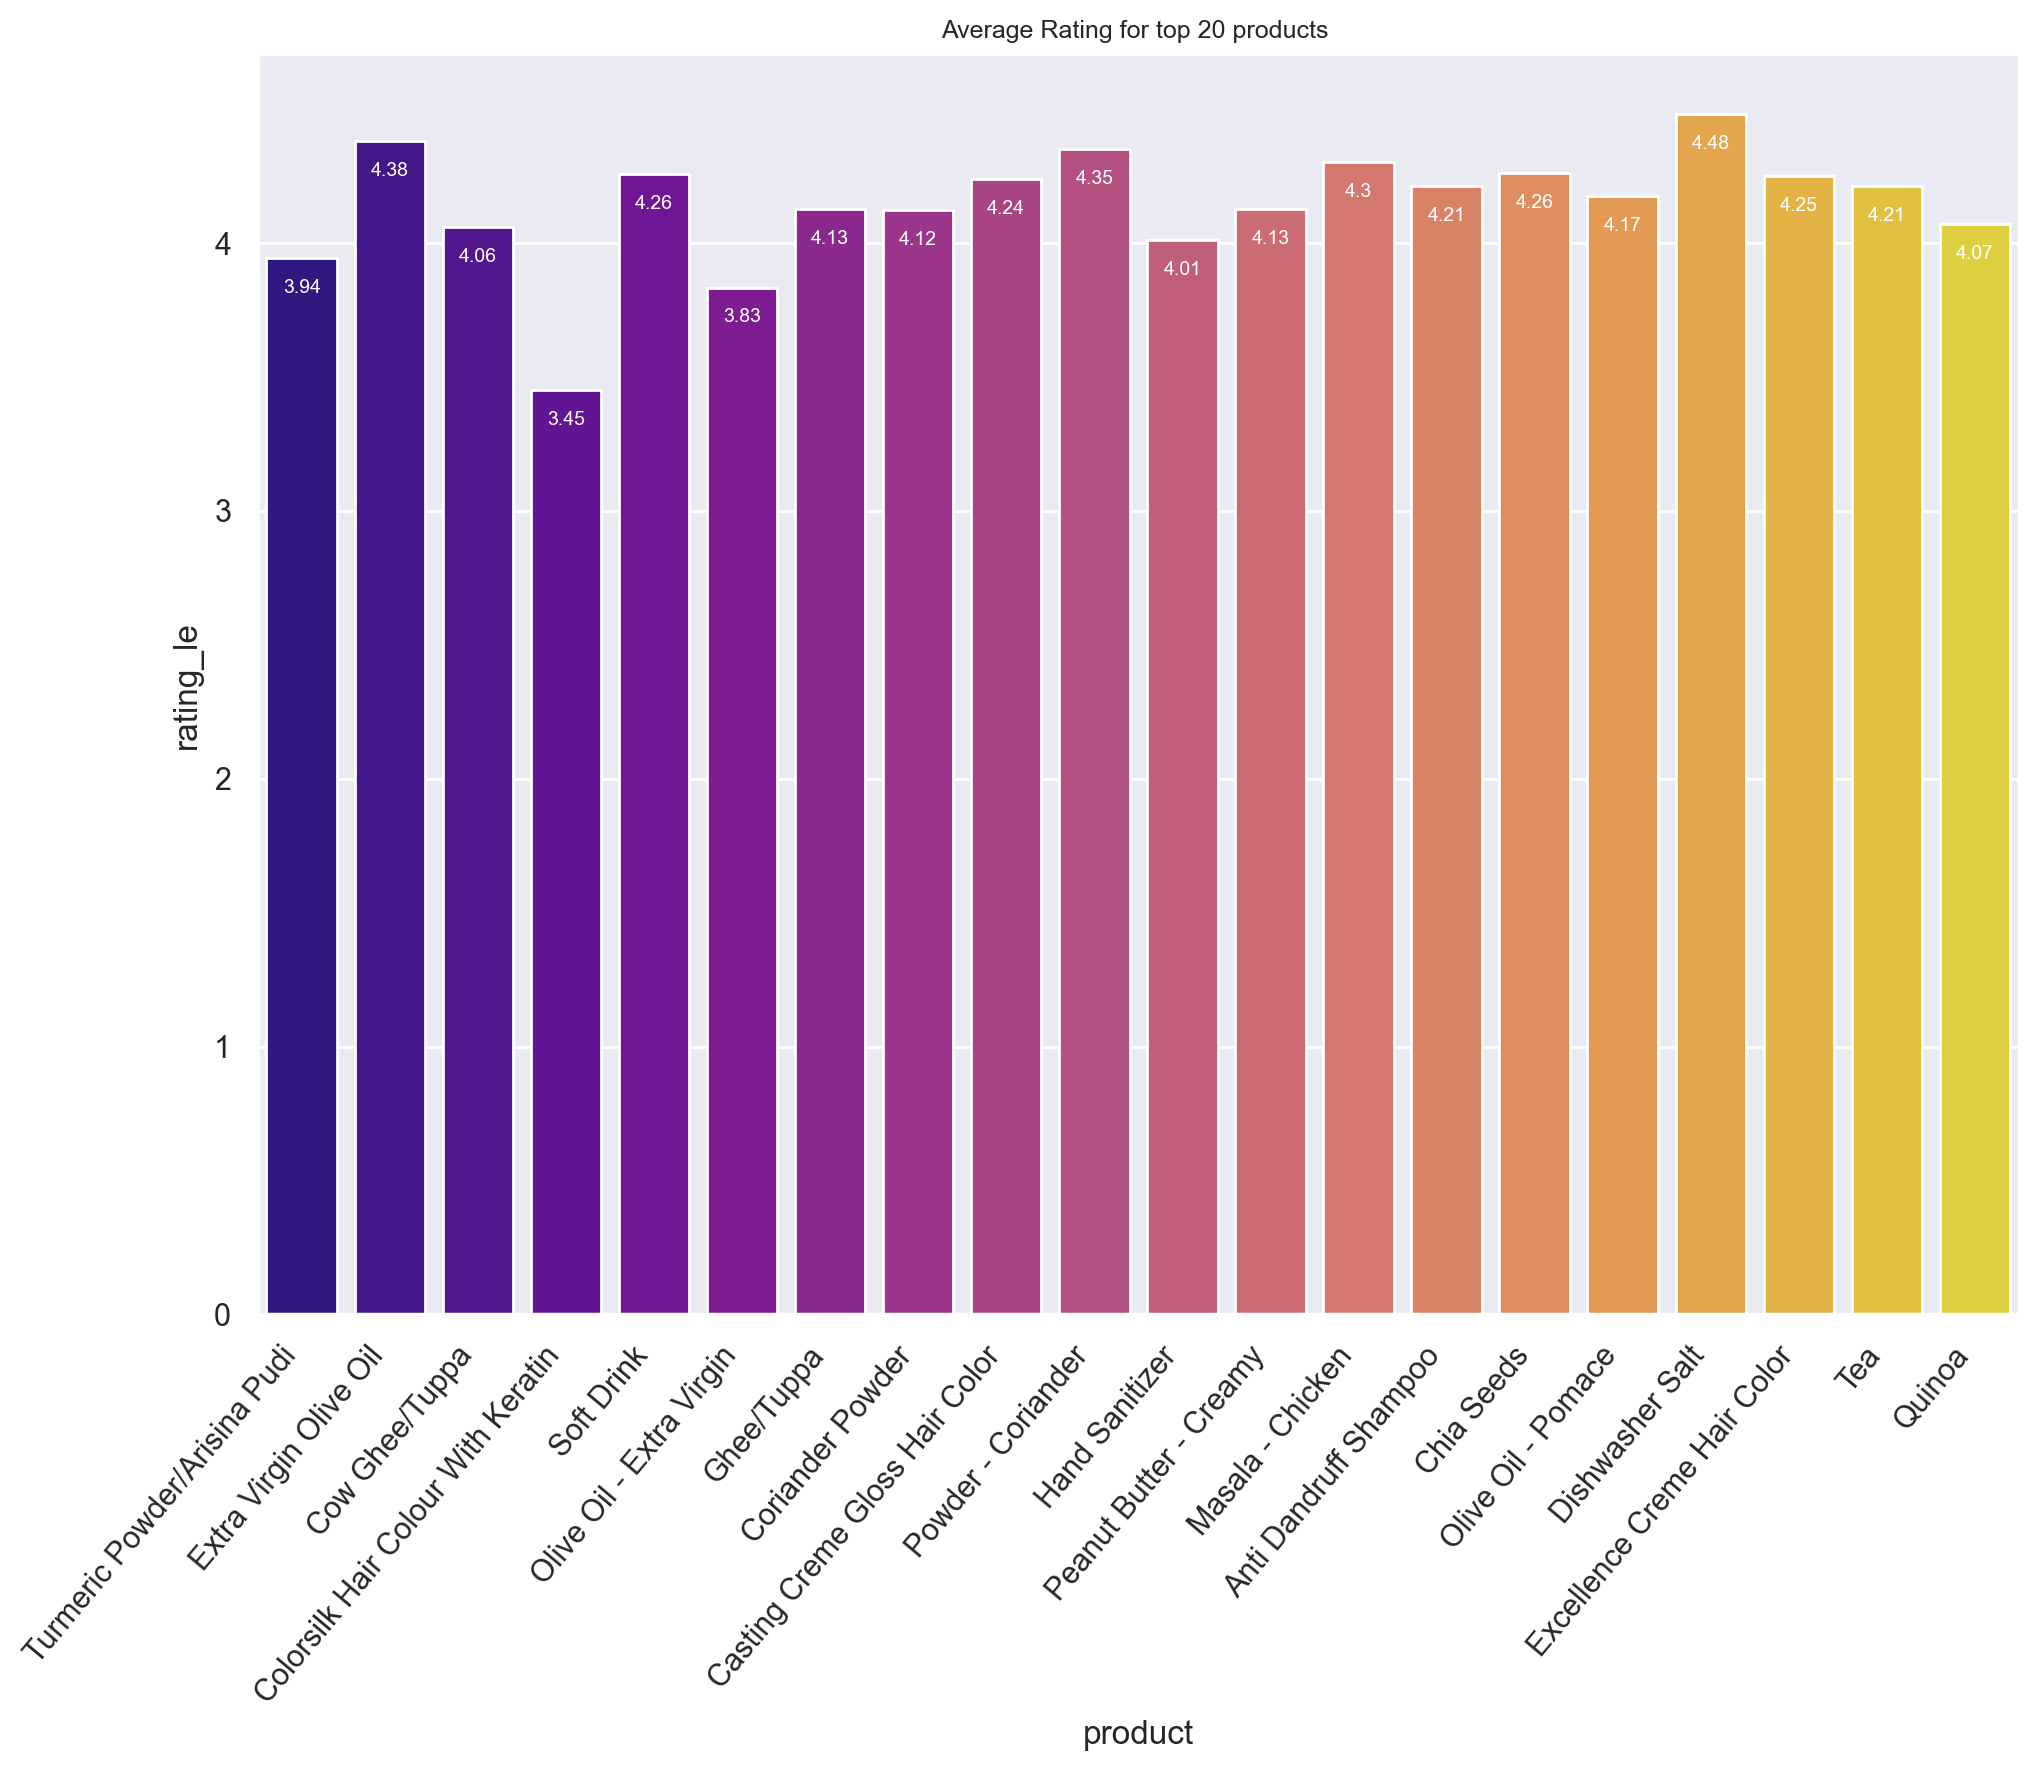

In [66]:
plt.figure(figsize=(25,18),dpi=200)

plt.subplot(2,1,1)
ax1 = sns.barplot(data=analysis,x=analysis['type'],y=analysis['rating_le'],palette='plasma',order=analysis['type'].value_counts().iloc[:20].index,ci=None)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=50, horizontalalignment='right')
ax1.set_title('Average Rating for top 20 product types ', fontsize=9)
for p in ax1.patches:
    ax1.annotate(f'\n{np.round(p.get_height(),2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=7)


plt.subplot(2,2,2)
ax2 = sns.barplot(data=analysis,x=analysis['product'],y=analysis['rating_le'],palette='plasma',order=analysis['product'].value_counts().iloc[:20].index,ci=None,color='black')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=50, horizontalalignment='right')
ax2.set_title('Average Rating for top 20 products ', fontsize=9)
for p in ax2.patches:
    ax2.annotate(f'\n{np.round(p.get_height(),2)}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=7)
plt.show()

In [67]:
#description
def process_text(text):
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    text = " ".join(filtered_sentence)
    return text

In [69]:
df['desc'] = df['description'].apply(process_text)

In [70]:
df[df['product'].str.contains("Garlic Oil",na=False)]

,product,category,sub_category,brand,sale_price,market_price,type,rating,description,missing_rating,diff_in_prices,desc
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,not missing,0.0,product contains garlic oil known help proper ...
16959,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,NaN,This Product contains Garlic Oil that is known...,missing,0.0,product contains garlic oil known help proper ...


why duplicates should be removed?
An entry appearing more than once receives disproportionate weight during training.
Duplicate entries can ruin the split between train, validation, and test sets where identical entries are not all in the same set. This can lead to biased performance estimates that result in disappointing the model in production.

In [71]:
df.duplicated(keep=False).sum()

703

In [72]:
df.drop(index=df[df.duplicated(keep=False)].isnull().any(1).index,inplace = True) 

In [73]:
df.shape

(26736, 12)

<Figure size 1600x1600 with 0 Axes>

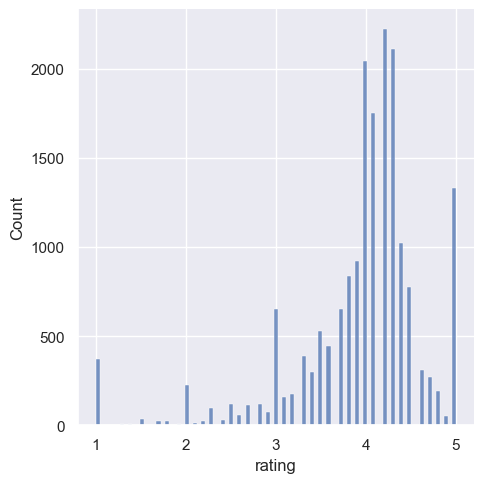

In [74]:
plt.figure(figsize=(16,16))
sns.displot(df, x="rating")

## Key Findings 
1. 31% of data has missing values in the ratings column
2. Most of the missing values belong to:
 1. 'Beauty & Hygiene'
 2. 'Gourmet & World Food'
 3. 'Kitchen, Garden & Pets' 
3. Ratings of 'Fruits & Vegetables' and 'Eggs, Meat & Fish' are completely missing 
4. Most popular categories are:
 1. 'Beauty & Hygiene'
 2. 'Gourmet & World Food'
 3. 'Kitchen, Garden & Pets'.
5. Least popular categories are:
 1. 'Eggs, Meat & Fish'
 2. 'Fruits & vegetables'
 3. 'Baby Care'.
6. Top selling products are:
 1. Turmeric powder
 2. Extra virgin olive oil
 3. Cow Ghee
7. Top selling brands are:
 1. Fresho
 2. BBRoyal
 3. BBHome
8. Sale Price and Market price are right skewed.
9. During sale the categories that fetched the highest revenue are:
 1. Beauty & Hygiene 
 2. Kitchen, Garden & Pets
 3. Cleaning & Households 
 
